In [1]:
install.packages('pacman')
library(pacman)
p_load(tidyverse,rio,tidymodels, keras, ggplot2, themis, yardstick, tensorflow)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
train_hogares <- read.csv('/content/train_hogares_3.csv')
test_hogares <- read.csv('/content/test_hogares_3.csv')
train_personas <- read.csv('/content/train_personas_3.csv')
test_personas <- read.csv('/content/test_personas_3.csv')

In [3]:
train_personas <- train_personas %>% mutate(LogIngreso = log(Ingreso+0.00001))

train_personas <- train_personas %>% mutate(Edad2 = Edad^2)

test_personas <- test_personas %>% mutate(Edad2 = Edad^2)

#train_personas <- train_personas %>% mutate(SexoEdad = Sexo*Edad)

#test_personas <- test_personas %>% mutate(SexoEdad = Sexo*Edad)

In [4]:
set.seed(123)
splitting <- initial_split(train_personas, prop = 0.8)
train_data <- training(splitting)
val_data <- testing(splitting)
test_data <- test_personas


In [5]:
summary(train_data)
glimpse(train_data)

      id                 Sexo            Edad          JefeHogar    
 Length:434487      Min.   :1.000   Min.   :  0.00   Min.   :1.000  
 Class :character   1st Qu.:1.000   1st Qu.: 16.00   1st Qu.:1.000  
 Mode  :character   Median :2.000   Median : 30.00   Median :3.000  
                    Mean   :1.529   Mean   : 33.53   Mean   :2.594  
                    3rd Qu.:2.000   3rd Qu.: 50.00   3rd Qu.:3.000  
                    Max.   :2.000   Max.   :110.00   Max.   :9.000  
  FormalSalud    SeguridadSocial  maxEducLevel       relab      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:3.000   1st Qu.:4.000  
 Median :1.000   Median :1.000   Median :4.000   Median :4.000  
 Mean   :1.059   Mean   :1.769   Mean   :4.192   Mean   :3.504  
 3rd Qu.:1.000   3rd Qu.:3.000   3rd Qu.:5.000   3rd Qu.:4.000  
 Max.   :9.000   Max.   :9.000   Max.   :9.000   Max.   :9.000  
   SubsAlimen      SubsTrans       SubsFamil     SubsEducativo

Rows: 434,487
Columns: 28
$ id                 <chr> "2208fcec0ee8bb5158947bfd", "8fc4966a4ca0af35b21dfe…
$ Sexo               <int> 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, …
$ Edad               <int> 52, 64, 1, 81, 2, 23, 37, 37, 16, 22, 17, 3, 63, 59…
$ JefeHogar          <int> 1, 1, 4, 5, 9, 3, 2, 1, 3, 2, 3, 3, 1, 1, 1, 1, 3, …
$ FormalSalud        <int> 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ SeguridadSocial    <int> 1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, …
$ maxEducLevel       <int> 3, 3, 3, 1, 3, 6, 5, 4, 5, 6, 6, 2, 6, 5, 3, 5, 6, …
$ relab              <int> 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 2, 4, 4, …
$ SubsAlimen         <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ SubsTrans          <int> 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, …
$ SubsFamil          <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ SubsEducativo      <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ Viaticos    

In [6]:
x_train <- train_data %>% select(- c(id,Ingreso,LogIngreso))
y_train <-train_data %>% pull(LogIngreso)
x_val <- val_data %>% select(- c(id,Ingreso,LogIngreso))
y_val <- val_data %>% pull(LogIngreso)
glimpse(x_train)

Rows: 434,487
Columns: 25
$ Sexo               <int> 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, …
$ Edad               <int> 52, 64, 1, 81, 2, 23, 37, 37, 16, 22, 17, 3, 63, 59…
$ JefeHogar          <int> 1, 1, 4, 5, 9, 3, 2, 1, 3, 2, 3, 3, 1, 1, 1, 1, 3, …
$ FormalSalud        <int> 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ SeguridadSocial    <int> 1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, …
$ maxEducLevel       <int> 3, 3, 3, 1, 3, 6, 5, 4, 5, 6, 6, 2, 6, 5, 3, 5, 6, …
$ relab              <int> 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 2, 4, 4, …
$ SubsAlimen         <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ SubsTrans          <int> 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, …
$ SubsFamil          <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ SubsEducativo      <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ Viaticos           <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ Bonificacion

In [7]:
rec <- recipe(~., data = x_train) %>%
  step_normalize(all_numeric())
x_train <- prep(rec) %>% bake(new_data = x_train)
x_val <- prep(rec) %>% bake(new_data = x_val)

In [8]:
lista_var_pers_train_categ  <- c('Sexo', 'JefeHogar', 'FormalSalud', 'SeguridadSocial', 'maxEducLevel', 'relab', 'SubsAlimen', 'SubsTrans', 'SubsFamil', 'SubsEducativo', 'Viaticos', 'Bonificaciones', 'FormalPension', 'MasHoras', 'PagosExtraPensArri', 'Ayuda', 'GanancFinan')
x_train<- x_train %>% model.matrix(~ . - 1, data = .)
x_val<- x_val %>% model.matrix(~ . - 1, data = .)


In [9]:
glimpse(x_train)
glimpse(x_val)

 num [1:434487, 1:25] -1.06 -1.06 -1.06 0.944 -1.06 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:434487] "1" "2" "3" "4" ...
  ..$ : chr [1:25] "Sexo" "Edad" "JefeHogar" "FormalSalud" ...
 - attr(*, "assign")= int [1:25] 1 2 3 4 5 6 7 8 9 10 ...
 num [1:108622, 1:25] -1.06 -1.06 -1.06 0.944 0.944 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:108622] "1" "2" "3" "4" ...
  ..$ : chr [1:25] "Sexo" "Edad" "JefeHogar" "FormalSalud" ...
 - attr(*, "assign")= int [1:25] 1 2 3 4 5 6 7 8 9 10 ...


In [10]:
EPOCHS <- 50
BATCH_SIZE <- 5112

In [11]:
tf$random$set_seed(123)

In [12]:
model <- keras_model_sequential() %>%
    layer_dense(units = 64, activation = 'sigmoid', input_shape = ncol(x_train))%>%
    layer_dense(units = 32, activation = 'sigmoid')%>%
    layer_dropout(rate = 0.5) %>%
    layer_dense(units = 1)

model %>% compile(
    optimizer = optimizer_rmsprop(),
    loss = "mean_squared_error",
    metrics = c("mean_absolute_error")
  )

  ##optimizer_adam(learning_rate = 1e-3)

In [13]:
# entrenamiento
historia_modelo_basico <- model %>% fit(
  x = x_train,
  y = y_train,
  batch_size = BATCH_SIZE,
  epochs = EPOCHS,
  validation_data = list(x_val, y_val),
  verbose = 0
)

In [14]:
historia_modelo_basico


Final epoch (plot to see history):
                   loss: 30.45
    mean_absolute_error: 3.728
               val_loss: 23.08
val_mean_absolute_error: 2.568 

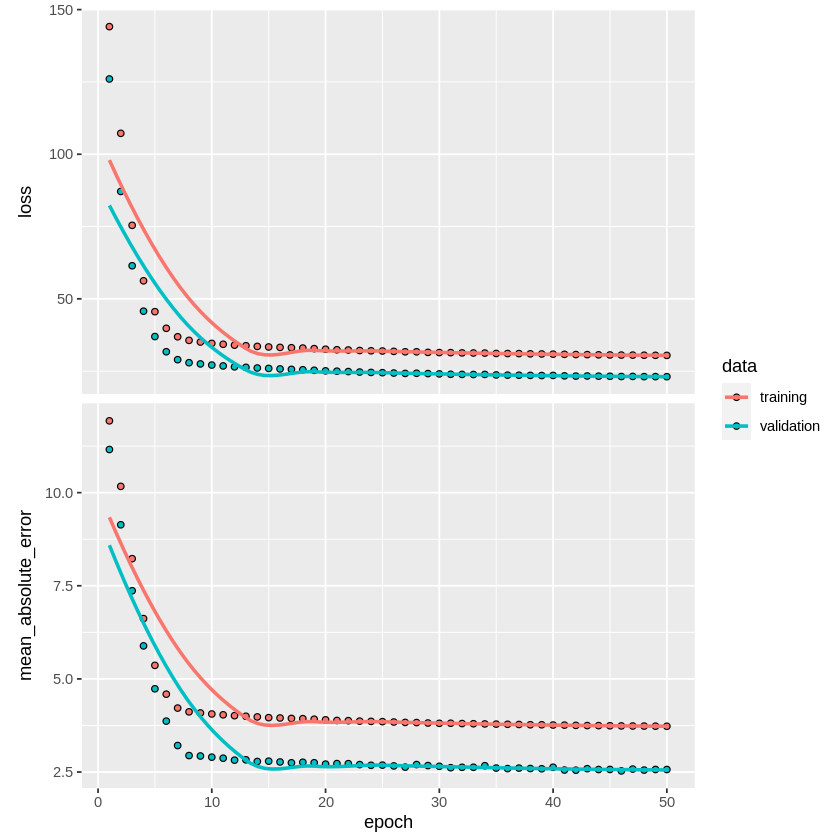

In [15]:
plot(historia_modelo_basico)

In [16]:
x_train_completa <- train_personas %>% select(- c(id,LogIngreso))

In [17]:
x_test<-test_data %>% select(- c(id))

In [18]:
x_train_completa <- prep(rec) %>% bake(new_data = x_train_completa)
x_test <- prep(rec) %>% bake(new_data = x_test)
glimpse(x_train_completa)
glimpse(x_test)

Rows: 543,109
Columns: 25
$ Sexo               <dbl> 0.9437339, -1.0596183, -1.0596183, -1.0596183, -1.0…
$ Edad               <dbl> 0.20659289, -1.41024049, 0.34517860, -1.41024049, -…
$ JefeHogar          <dbl> -0.3898100, 0.2667571, -1.0463771, 0.2667571, 0.266…
$ FormalSalud        <dbl> -0.2077285, -0.2077285, -0.2077285, -0.2077285, -0.…
$ SeguridadSocial    <dbl> -0.8005391, -0.8005391, -0.8005391, -0.8005391, -0.…
$ maxEducLevel       <dbl> -0.8441523, -1.5524972, 0.5725375, -1.5524972, -0.1…
$ relab              <dbl> -1.9933655, 0.3949122, -1.9933655, 0.3949122, 0.394…
$ SubsAlimen         <dbl> 0.02343799, 0.02343799, 0.02343799, 0.02343799, 0.0…
$ SubsTrans          <dbl> -2.5197032, 0.2648019, -2.5197032, 0.2648019, 0.264…
$ SubsFamil          <dbl> -4.040046, 0.189870, -4.040046, 0.189870, 0.189870,…
$ SubsEducativo      <dbl> 0.00123885, 0.00123885, 0.00123885, 0.00123885, 0.0…
$ Viaticos           <dbl> 0.07535105, 0.07535105, 0.07535105, 0.07535105, 0.0…
$ Bonificacion

In [19]:
lista_var_pers_train_categ  <- c('Sexo', 'JefeHogar', 'FormalSalud', 'SeguridadSocial', 'maxEducLevel', 'relab', 'SubsAlimen', 'SubsTrans', 'SubsFamil', 'SubsEducativo', 'Viaticos', 'Bonificaciones', 'FormalPension', 'MasHoras', 'PagosExtraPensArri', 'Ayuda', 'GanancFinan')
x_train_completa<- x_train_completa %>% model.matrix(~ . - 1, data = .)
x_test<- x_test %>% model.matrix(~ . - 1, data = .)

In [20]:
Ingreso_pred_train <- model %>% predict(x_train_completa)


In [21]:
Ingreso_pred_train <- exp(Ingreso_pred_train)

In [22]:
summary(Ingreso_pred_train)

       V1        
 Min.   :     0  
 1st Qu.:     0  
 Median : 52606  
 Mean   :207187  
 3rd Qu.:505066  
 Max.   :561072  

In [23]:
train_personas$Ingreso_pred_train<-Ingreso_pred_train

Ingreso_train_hogar<-aggregate(train_personas$Ingreso_pred_train, by=list(Category=train_personas$id), FUN=sum)



In [24]:
glimpse(Ingreso_train_hogar)

Rows: 164,960
Columns: 2
$ Category <chr> "00004a3f76ed8c33d84a5c70", "000088edf78cfaaf1791beba", "0000…
$ V1       <dbl> 6.632296e+05, 1.852104e+05, 6.613765e+05, 2.337789e+05, 1.133…


In [25]:
Ingreso_train_hogar$Ingreso_pred_train_hogar<-Ingreso_train_hogar$V1
Ingreso_train_hogar$id<-Ingreso_train_hogar$Category
glimpse(Ingreso_train_hogar)


Rows: 164,960
Columns: 4
$ Category                 <chr> "00004a3f76ed8c33d84a5c70", "000088edf78cfaaf…
$ V1                       <dbl> 6.632296e+05, 1.852104e+05, 6.613765e+05, 2.3…
$ Ingreso_pred_train_hogar <dbl> 6.632296e+05, 1.852104e+05, 6.613765e+05, 2.3…
$ id                       <chr> "00004a3f76ed8c33d84a5c70", "000088edf78cfaaf…


In [26]:

train_hogares_comparacion<-merge(train_hogares, Ingreso_train_hogar, by='id', all.x=TRUE)

In [27]:
head(train_hogares_comparacion)

,id,Clase,Dominio,cuartos,cuartosHab,Propiedad,ArriendoEst,Arriendo,Nper,Npersug,Ingtotug,Ingtotugarr,Ingpcug,Li,Lp,Pobre,Indigente,Category,V1,Ingreso_pred_train_hogar
,<chr>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
1,00004a3f76ed8c33d84a5c70,1,RESTO URBANO,3,2,1,250000,0,5,5,1076429,1326429,265285.9,121307.8,281549.3,1,0,00004a3f76ed8c33d84a5c70,663229.6,663229.6
2,000088edf78cfaaf1791beba,1,RESTO URBANO,3,2,3,0,300000,3,3,1032500,1032500,344166.7,121948.3,282748.7,0,0,000088edf78cfaaf1791beba,185210.4,185210.4
3,00009b13480f6770b6a4d1e9,1,MANIZALES,4,3,1,700000,0,3,3,1800000,2500000,833333.3,120213.1,285285.5,0,0,00009b13480f6770b6a4d1e9,661376.5,661376.5
4,0000f3ec65ccacadfcc59f32,1,SANTA MARTA,4,2,1,350000,0,3,3,1812492,2162492,720830.7,121930.6,276485.7,0,0,0000f3ec65ccacadfcc59f32,1133639.1,1133639.1
5,0001081bf03faa5ec019c393,1,ARMENIA,4,2,3,0,370000,4,4,1000000,1000000,250000.0,120434.7,274557.1,1,0,0001081bf03faa5ec019c393,115935.5,115935.5
6,000118206b55d57ef327dc39,1,TUNJA,4,3,3,0,400000,5,5,1700000,1700000,340000.0,124044.4,279263.1,0,0,000118206b55d57ef327dc39,752739.6,752739.6


In [28]:
train_hogares_comparacion<-train_hogares_comparacion %>% mutate(Ingpcug_pred = (Ingreso_pred_train_hogar+ArriendoEst)/Npersug)
train_hogares_comparacion<-train_hogares_comparacion %>% mutate(Pobre_pred = case_when(Ingpcug_pred >= Lp ~ 0,
                                                                                       Ingpcug_pred < Lp ~ 1))
train_hogares_comparacion <- train_hogares_comparacion %>% mutate_at(c('Pobre','Pobre_pred'), as.factor)


In [29]:
head(train_hogares_comparacion)

,id,Clase,Dominio,cuartos,cuartosHab,Propiedad,ArriendoEst,Arriendo,Nper,Npersug,⋯,Ingpcug,Li,Lp,Pobre,Indigente,Category,V1,Ingreso_pred_train_hogar,Ingpcug_pred,Pobre_pred
,<chr>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
1,00004a3f76ed8c33d84a5c70,1,RESTO URBANO,3,2,1,250000,0,5,5,⋯,265285.9,121307.8,281549.3,1,0,00004a3f76ed8c33d84a5c70,663229.6,663229.6,182645.92,1
2,000088edf78cfaaf1791beba,1,RESTO URBANO,3,2,3,0,300000,3,3,⋯,344166.7,121948.3,282748.7,0,0,000088edf78cfaaf1791beba,185210.4,185210.4,61736.80,1
3,00009b13480f6770b6a4d1e9,1,MANIZALES,4,3,1,700000,0,3,3,⋯,833333.3,120213.1,285285.5,0,0,00009b13480f6770b6a4d1e9,661376.5,661376.5,453792.16,0
4,0000f3ec65ccacadfcc59f32,1,SANTA MARTA,4,2,1,350000,0,3,3,⋯,720830.7,121930.6,276485.7,0,0,0000f3ec65ccacadfcc59f32,1133639.1,1133639.1,494546.38,0
5,0001081bf03faa5ec019c393,1,ARMENIA,4,2,3,0,370000,4,4,⋯,250000.0,120434.7,274557.1,1,0,0001081bf03faa5ec019c393,115935.5,115935.5,28983.88,1
6,000118206b55d57ef327dc39,1,TUNJA,4,3,3,0,400000,5,5,⋯,340000.0,124044.4,279263.1,0,0,000118206b55d57ef327dc39,752739.6,752739.6,150547.91,1


In [30]:
glimpse(train_hogares_comparacion$Pobre_pred)
summary(train_hogares_comparacion$Ingpcug_pred)

 Factor w/ 2 levels "0","1": 2 2 1 1 2 2 1 1 2 2 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0  161734  268928  303250  399709 2085397 

In [31]:
matriz_confusion <- conf_mat(data.frame(true = train_hogares_comparacion$Pobre, pred = train_hogares_comparacion$Pobre_pred),true,pred)

matriz_confusion

          Truth
Prediction     0     1
         0 48099  1092
         1 36942 21751

In [32]:
pred_ingreso <- model %>% predict(x_test)
pred_ingreso <- exp(pred_ingreso)


In [33]:
summary(pred_ingreso)

       V1        
 Min.   :     0  
 1st Qu.:     0  
 Median : 80793  
 Mean   :185507  
 3rd Qu.:368845  
 Max.   :561073  

In [34]:
test_personas$Ingreso<-pred_ingreso

summary(test_personas$Ingreso)

Ingreso_hogar<-aggregate(test_personas$Ingreso, by=list(Category=test_personas$id), FUN=sum)

head(Ingreso_hogar)

       V1        
 Min.   :     0  
 1st Qu.:     0  
 Median : 80793  
 Mean   :185507  
 3rd Qu.:368845  
 Max.   :561073  

,Category,V1
,<chr>,<dbl>
1,00007322a7918c7799e7a514,132374.7483
2,0004847804c0618d4633b196,111.0753
3,0004add76858a3b0cc39eb9b,1052087.3308
4,000804ac64d779b35ee5edfa,849233.1134
5,000b6a116b7f95b043a6e77b,377747.7364
6,000c2eff74d698f89f5721c7,1004658.3894


In [35]:
Ingreso_hogar$Ingreso<-Ingreso_hogar$V1
Ingreso_hogar$id<-Ingreso_hogar$Category

test_hogares_cargue<-merge(test_hogares, Ingreso_hogar, by='id', all.x=TRUE)

test_hogares_cargue<-test_hogares_cargue %>% mutate(Ingpcug = (Ingreso+ArriendoEst)/Npersug)
test_hogares_cargue<-test_hogares_cargue %>% mutate(Pobre = case_when(Ingpcug >= Lp ~ 0,
                                                                      Ingpcug < Lp ~ 1))

test_hogares_cargue<-test_hogares_cargue %>% select(id,Pobre)

In [36]:
head(test_hogares_cargue)
glimpse(test_hogares_cargue)
summary(test_hogares_cargue)

,id,Pobre
,<chr>,<dbl>
1,00007322a7918c7799e7a514,0
2,0004847804c0618d4633b196,1
3,0004add76858a3b0cc39eb9b,1
4,000804ac64d779b35ee5edfa,1
5,000b6a116b7f95b043a6e77b,0
6,000c2eff74d698f89f5721c7,0


Rows: 66,168
Columns: 2
$ id    <chr> "00007322a7918c7799e7a514", "0004847804c0618d4633b196", "0004add…
$ Pobre <dbl> 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1…


      id                Pobre       
 Length:66168       Min.   :0.0000  
 Class :character   1st Qu.:0.0000  
 Mode  :character   Median :1.0000  
                    Mean   :0.5513  
                    3rd Qu.:1.0000  
                    Max.   :1.0000  

In [37]:
write.csv(test_hogares_cargue, file='Redes_20.csv', row.names = FALSE)